# Task 2: Thematic analysis 
```
 Analyze customer reviews to extract key recurring themes using NLP techniques (TF-IDF, N-grams).
 This will help banks understand major pain points and satisfaction drivers.
 ```

In [13]:
# Imported libraries and downloads
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Downloads (run once)
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jilow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jilow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Load dataset
# Load data
df = pd.read_csv("../data/bank_reviews_bert_sentiment.csv")
df.dropna(subset=['review_text'], inplace=True)

df.head()

,review_text,rating,date,bank_name,source,clean_review,bert_sentiment,bert_score,sentiment_numeric
0,A great app. It's like carrying a bank in your...,4,2025-06-07,Commercial Bank of Ethiopia,Google Play,a great app its like carrying a bank in your p...,POSITIVE,0.987794,1
1,More than garrantty bank EBC.,4,2025-06-07,Commercial Bank of Ethiopia,Google Play,more than garrantty bank ebc,POSITIVE,0.996633,1
2,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia,Google Play,really am happy to this app it is siple to use...,POSITIVE,0.998870,1
3,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia,Google Play,i liked this app but the user interface is ver...,NEGATIVE,0.999646,0
4,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play,why don’t your atms support accounttoaccount t...,NEGATIVE,0.997130,0


In [8]:
#  Preprocess Text (Lowercase, Remove Stopwords)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

df["cleaned_text"] = df["review_text"].apply(preprocess_text)
df.head()


,review_text,rating,date,bank_name,source,clean_review,bert_sentiment,bert_score,sentiment_numeric,cleaned_text
0,A great app. It's like carrying a bank in your...,4,2025-06-07,Commercial Bank of Ethiopia,Google Play,a great app its like carrying a bank in your p...,POSITIVE,0.987794,1,great like carrying bank
1,More than garrantty bank EBC.,4,2025-06-07,Commercial Bank of Ethiopia,Google Play,more than garrantty bank ebc,POSITIVE,0.996633,1,garrantty bank
2,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia,Google Play,really am happy to this app it is siple to use...,POSITIVE,0.998870,1,really happy app siple use everything
3,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia,Google Play,i liked this app but the user interface is ver...,NEGATIVE,0.999646,0,liked user interface basic attractive
4,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play,why don’t your atms support accounttoaccount t...,NEGATIVE,0.997130,0,atms support transfers like nigeria south


## Thematic analysis

In [9]:
# extract keywords using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_text"])

feature_names = tfidf_vectorizer.get_feature_names_out()


In [10]:
# get top keywords per Bank
def get_top_keywords(bank_name, n=15):
    bank_reviews = df[df['bank_name'] == bank_name]
    bank_matrix = tfidf_vectorizer.transform(bank_reviews["cleaned_text"])
    summed = bank_matrix.sum(axis=0)
    keywords = [(feature_names[i], summed[0, i]) for i in range(len(feature_names))]
    sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return sorted_keywords[:n]

banks = df['bank_name'].unique()
for bank in banks:
    print(f"\nTop keywords for {bank}:")
    print(get_top_keywords(bank))



Top keywords for Commercial Bank of Ethiopia:
[('app', 19.970816624147883), ('good', 15.99895073206031), ('cbe', 8.830875950750096), ('nice', 7.55172507626362), ('best', 7.458836490322599), ('screenshot', 7.0375742710701115), ('bank', 6.922166163203886), ('like', 5.882236790755008), ('application', 5.304539211416967), ('ነው', 5.124494345812739), ('work', 4.898913118745292), ('banking', 4.683635104791494), ('make', 4.596695916491482), ('use', 4.365254227789892), ('screen', 4.311594063463065)]

Top keywords for Bank of Abyssinia:
[('app', 27.542159846044374), ('work', 12.624676510893181), ('please', 9.971641518192682), ('worst', 9.811262995916364), ('bank', 9.61355758266865), ('use', 9.425912247654807), ('working', 8.840528935551498), ('banking', 8.539562128788722), ('good', 8.407831241829498), ('mobile', 7.946843129539621), ('developer', 7.0811933468585275), ('boa', 6.934001153203314), ('even', 6.614592932182441), ('best', 6.041212793031161), ('ever', 5.766273581533849)]

Top keywords f

In [11]:
# Manually group key words in to themes
# Define some rule-based keyword-to-theme mapping
theme_keywords = {
    "Account Access Issues": ["login", "otp", "password", "fail", "account", "reset"],
    "Transaction Performance": ["transfer", "send", "slow", "failed", "loading", "response"],
    "User Interface & Experience": ["ui", "interface", "design", "navigate", "friendly", "layout"],
    "Customer Support": ["help", "support", "respond", "feedback", "call", "email"],
    "Feature Requests": ["fingerprint", "dark mode", "statement", "feature", "update", "tool"]
}

def identify_theme(text):
    matched = []
    for theme, keywords in theme_keywords.items():
        if any(kw in text for kw in keywords):
            matched.append(theme)
    return matched if matched else ["Miscellaneous"]

df["themes"] = df["cleaned_text"].apply(identify_theme)
df[["review_text", "themes"]].head(10)


,review_text,themes
0,A great app. It's like carrying a bank in your...,[Miscellaneous]
1,More than garrantty bank EBC.,[Miscellaneous]
2,really am happy to this app it is Siple to use...,[Miscellaneous]
3,I liked this app. But the User interface is ve...,[User Interface & Experience]
4,"""Why don’t your ATMs support account-to-accoun...","[Transaction Performance, Customer Support]"
5,what is this app problem???,[Miscellaneous]
6,the app is proactive and a good connections.,[Miscellaneous]
7,I cannot send to cbebirr app. through this app.,[Transaction Performance]
8,everytime you uninstall the app you have to re...,[Miscellaneous]
9,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,[Miscellaneous]


In [19]:
df.to_csv("../data/bank_reviews_thematic.csv", index=False)

## Visualization

C:\Users\jilow\AppData\Local\Temp\ipykernel_24780\1576084252.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.values, y=theme_counts.index, palette="Set2")


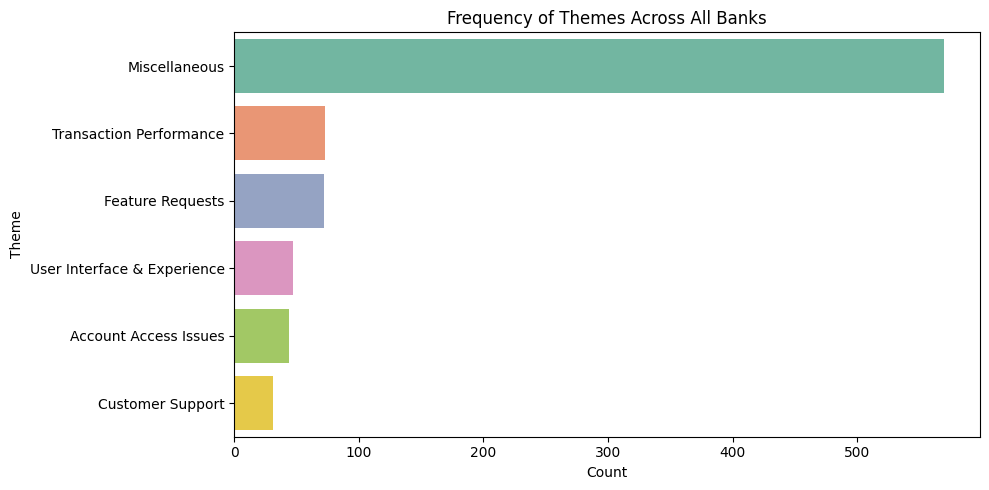

In [24]:
#theme distribution
# Flatten list of themes into a single column
all_themes = df.explode("themes")
theme_counts = all_themes["themes"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=theme_counts.values, y=theme_counts.index, palette="Set2")
plt.title("Frequency of Themes Across All Banks")
plt.xlabel("Count")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()

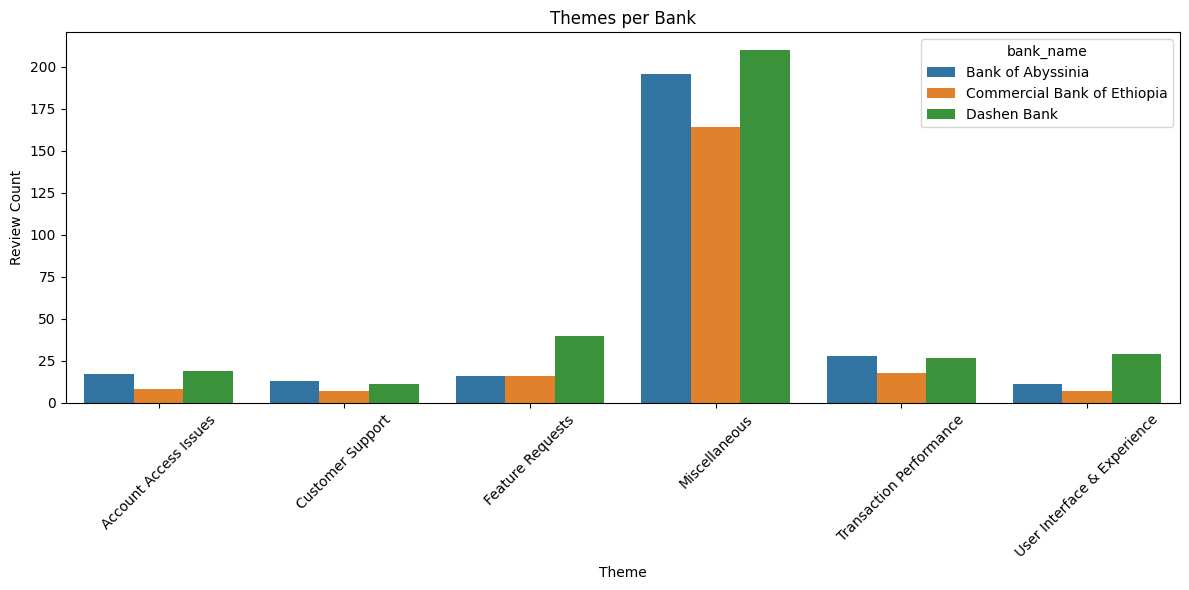

In [15]:
# Them frequency visualization per bank
# Count themes per bank
theme_by_bank = df.explode("themes").groupby(["bank_name", "themes"]).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=theme_by_bank, x="themes", y="count", hue="bank_name")
plt.title("Themes per Bank")
plt.xlabel("Theme")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


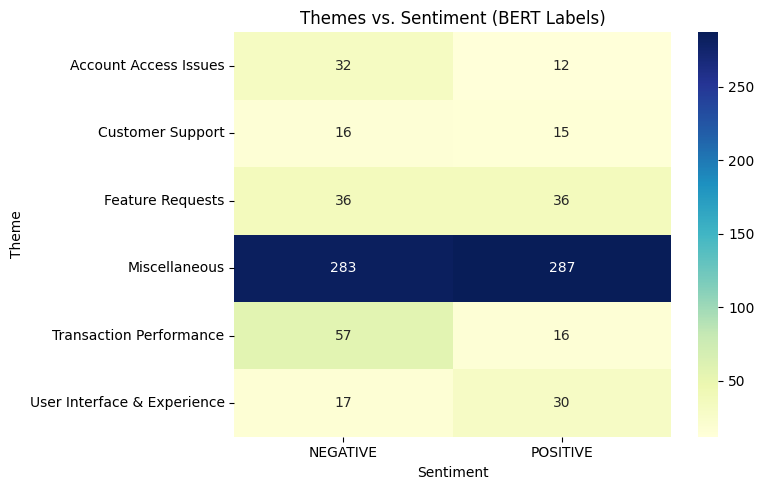

In [18]:
# Themes by sentiment
# Explode for one theme per row
theme_sentiment = df.explode("themes")

# Create pivot table: themes vs. sentiment label
pivot = theme_sentiment.pivot_table(
    index="themes",
    columns="bert_sentiment",
    aggfunc="size",
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Themes vs. Sentiment (BERT Labels)")
plt.xlabel("Sentiment")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()

